In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

from keras.models import load_model


In [48]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load  dataset
dataset = pd.read_csv('/home_l/francovm/Projects/SSE/data/processed/input_data.csv', sep='\t', encoding='utf-8' ,index_col=0)

# split into input (X) and output (Y) variables

train_X = dataset.drop(columns=['Events'])

#one-hot encode target column
# train_Y = to_categorical(dataset.Events)

#Non categorical data
train_Y = dataset['Events'].values


#get number of columns in training data
n_cols = train_X.shape[1]


In [49]:
dataset.columns

Index(['x', 'error', 'n', 'n_error', 'u', 'u_error', 'Events'], dtype='object')

In [50]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
# (trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed)

In [51]:
X_train.head()

,x,error,n,n_error,u,u_error
144713,-41.89,2.17,90.36,2.41,-1.40,8.70
202164,34.15,1.84,-47.02,2.03,0.79,7.06
175681,-16.90,2.13,87.81,2.19,-22.43,8.51
73565,-3.32,2.21,118.61,2.15,-5.72,8.15
151695,47.91,1.31,-80.90,1.49,0.01,4.98


In [52]:
y_train.shape

# plt.plot(y_train)

(152570,)

In [57]:
model_2 = Sequential()

# add layers to model

# model.add(Dense(12, input_dim=7, activation='relu'))
#
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='relu')) # extra layer
# model.add(Dense(10, activation='relu')) # extra layer
# model.add(Dense(10, activation='relu')) # extra layer
# model.add(Dense(2, activation='sigmoid'))

#add layers to model
model_2.add(Dense(512, activation='relu', input_shape=(n_cols,)))
# model_2.add(Dropout(0.5))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

# Compile model

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
# model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)

# Fit the model

# history = model.fit(train_X,train_Y, batch_size=100, epochs=10)

# history = model_2.fit(train_X,train_Y, epochs=40, validation_split=0.3)

history = model_2.fit(X_train,y_train, 
                      epochs=100, 
                      validation_split=0.3,
                      batch_size=64,
                      callbacks=[early_stopping_monitor])

# history = model_2.fit(train_X,train_Y, epochs=40, validation_data=(X_test,y_test), callbacks=[early_stopping_monitor])

# model_2.fit(train_X,train_Y, epochs=10, validation_split=0.2, callbacks=[early_stopping_monitor])


Train on 106799 samples, validate on 45771 samples
Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor of shape [512] and type float
	 [[node training_12/Adam/zeros_9 (defined at /home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:702) ]]

Original stack trace for 'training_12/Adam/zeros_9':
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-1de6ee15aa57>", line 38, in <module>
    callbacks=[early_stopping_monitor])
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in fit
    self._make_train_function()
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/keras/engine/training.py", line 509, in _make_train_function
    loss=self.total_loss)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/keras/optimizers.py", line 488, in get_updates
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/keras/optimizers.py", line 488, in <listcomp>
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py", line 702, in zeros
    v = tf.zeros(shape=shape, dtype=tf_dtype, name=name)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 1871, in zeros
    output = _constant_if_small(zero, shape, dtype, name)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 1829, in _constant_if_small
    return constant(value, shape=shape, dtype=dtype, name=name)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/constant_op.py", line 246, in constant
    allow_broadcast=True)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/constant_op.py", line 290, in _constant_impl
    name=name).outputs[0]
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
#  Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
 # Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [28]:
# def plot_history(histories, key='binary_crossentropy'):
#   plt.figure(figsize=(16,10))

#   for name, history in histories:
#     val = plt.plot(history.epoch, history.history['val_'+key],
#                    '--', label=name.title()+' Val')
#     plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
#              label=name.title()+' Train')

#   plt.xlabel('Epochs')
#   plt.ylabel(key.replace('_',' ').title())
#   plt.legend()

#   plt.xlim([-2,max(history.epoch)])

# plot_history([('baseline', history)])

In [29]:
# evaluate the model
scores = model_2.evaluate(X_test,y_test)
print((scores[1]*100))

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [24]:
y_test

array([0., 0., 0., ..., 0., 1., 0.])

In [25]:
ynew = model_2.predict(X_test)

# ynew = np.argmax(ynew[:])

In [26]:
ynew.shape

(75147, 1)

In [27]:
ynew

array([[1.8756598e-01],
       [9.8507702e-02],
       [8.9406967e-08],
       ...,
       [4.3042045e-02],
       [1.2702800e-01],
       [3.8611460e-02]], dtype=float32)

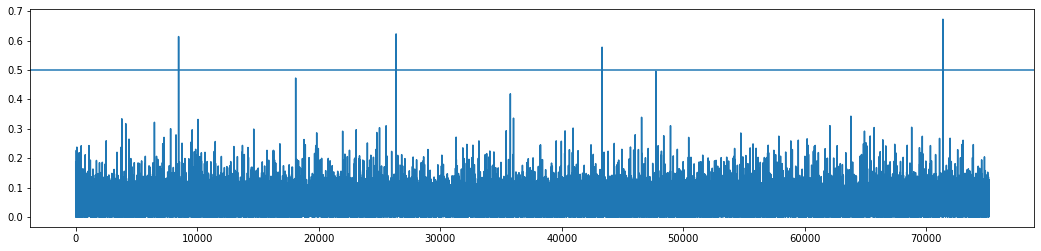

In [29]:
plt.plot(ynew) # plotting by columns
plt.axhline(0.5)
plt.show()

In [97]:
ynew

array([[2.0386726e-01],
       [6.5261841e-02],
       [1.4901161e-07],
       ...,
       [3.8702101e-02],
       [1.1518244e-01],
       [6.2616006e-02]], dtype=float32)

# Save the Model (Keras)

In [33]:
# save model and architecture to single file
# model_2.save("NN_SSE_95.h5")

In [ ]:
# # load model
# model = load_model('NN_SSE_95.h5')
# # summarize model.
# model.summary()



In [ ]:
# # load dataset
# dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # evaluate the model
# score = model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))